DS 5220 Final Project - Chase Kenyon

# Overview
In this notebook I experiment with a variety of classification methods on the CIFAR10 dataset. This dataset consists of 60,000 32x32 colored images (60000x32x32x3) which I split into training and testing sets of size 50,000 and 10,000 respectively. Each image in the dataset is a picture one a particular object seen in the classes in the next cell. I use logistic regression, kernel support vector classification, a multi-layer perceptron classifier, and a convolutional neural network to try to attempt to accurately predict these classes.

In [3]:
#Import libraries
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Load and split data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170498071/170498071 [==============================] - 80s 0us/step


In [1]:
type(X_train)

NameError: name 'X_train' is not defined

In [34]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


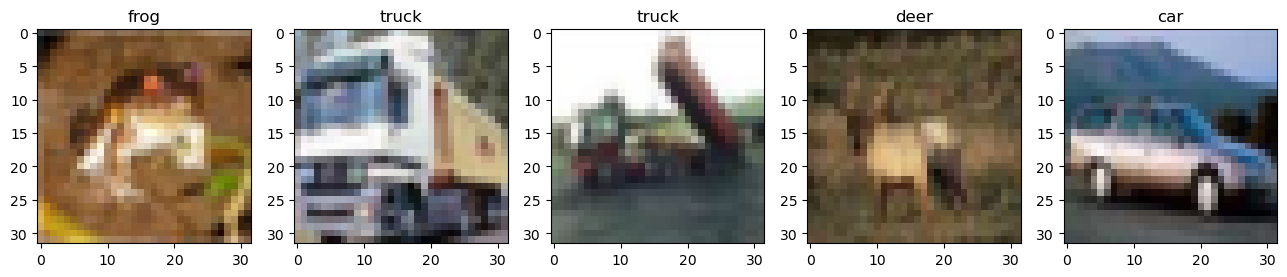

In [35]:
# Show 5 random pictures and their labels
f, axarr = plt.subplots(1, 5)
f.set_size_inches(16, 6)

for i in range(5):
    img = X_train[i]
    axarr[i].imshow(img)
    axarr[i].set_title(classes[y_train[i][0]])
plt.show()

Normalization of data is often critical for certain models to run most effectivvely, below we flatten images from their 32,32,3 shape into a flat 3072 dimension vector.

In [36]:
#Flatten images
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize to 0-1 range

X_train /= 255
X_test /= 255

In [37]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(50000, 3072)
(50000, 1)
Shape of test data:
(10000, 3072)
(10000, 1)


In [38]:
y_train = np.ravel(y_train)

## Logistic Regression

Logistic regression is often seen as a more simple model, the goal is to find a line that best fits the data similar to linear regression, and use a logistic function to classify the data from there. The model uses an L2 penality, and a slightly increased maximum iterations to get closer to convergence.

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression(random_state = 42, verbose = 1, max_iter = 1000)

In [10]:
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\chase\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min finished


LogisticRegression(max_iter=1000, random_state=42, verbose=1)

In [11]:
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.3885

With an accuracy score of about .39, this is certainly far ahead of the accuracy expected by randomly guessing the target variable, but still not very high. It took 1.3 minutes to go through 1000 iterations, but did not converge in this time. We can see if other more sophisticated models may be able to do a better job.

## Kernel SVC

Next we use a kernel support vector classification model. A support vector classifier shares some similarities with logistic regression in that they are both linear models which seek to separate the data into classes, but SVC uses a hyperplane with a maximized margin to separate classes. With kernel SVC we can transform the data into a higher-dimensional space where it may be more easily linearly separable. In this model we are using SKlearn's default rbf (radial basis function) kernel, aka Gaussian kernel with degree 3. 

In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC(random_state= 44, verbose = 1)

In [15]:
svc.fit(X_train, y_train)

[LibSVM]

SVC(random_state=44, verbose=1)

In [16]:
y_pred = svc.predict(X_test)

In [17]:
accuracy_score(y_test, y_pred)

0.5436

With Kernel SVC with see a noticable improvement to an accuracy score of about .54 on the test set. The gaussian kernel of this SVC model transforms the data into a space where the data is more linearly separable, at this point, over 50% correct prediction rate is beginning to look decent, adding kernels and higher degree polynomial functions allows kSVC to perform markedly better than out simple logistic regression model. One of the major downsides is that this model took by far the longest at around 30 minutes total runtime.

## Multi-layer Perceptron

Next we try to use the MLPClassifier, aka Multi-layer Perceptron classifier. This is a type of feedforward neural network with input, hidden, and output layers, but does not have convolutional layers. This model uses the adam solver, which is a SGD based optimizer, which works well on datasets of this size, we also use the default relu activation function and a constant learning rate at .001. The MLP uses forward and backpropagation to calculate loss and recalculate the weights between each neuron on each iteration, ideally optimizing the weights for the task each time. The model is also set to keep 20% of the training data aside for validation to check for early stopping, and to compare the validation score across iterations.

In [59]:
from sklearn.neural_network import MLPClassifier

In [60]:
mlp = MLPClassifier(random_state = 42, verbose = 2, learning_rate = 'constant', max_iter = 15, early_stopping = True, validation_fraction = .2)

In [61]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.99446559
Validation score: 0.331300
Iteration 2, loss = 1.82960211
Validation score: 0.355200
Iteration 3, loss = 1.78754776
Validation score: 0.366200
Iteration 4, loss = 1.75680725
Validation score: 0.374700
Iteration 5, loss = 1.72422851
Validation score: 0.396200
Iteration 6, loss = 1.70223145
Validation score: 0.402900
Iteration 7, loss = 1.67899079
Validation score: 0.403000
Iteration 8, loss = 1.66250322
Validation score: 0.409000
Iteration 9, loss = 1.63530030
Validation score: 0.415600
Iteration 10, loss = 1.62162392
Validation score: 0.419400
Iteration 11, loss = 1.62293157
Validation score: 0.417700
Iteration 12, loss = 1.60727684
Validation score: 0.416100
Iteration 13, loss = 1.59645959
Validation score: 0.418600
Iteration 14, loss = 1.58619077
Validation score: 0.425900
Iteration 15, loss = 1.58001435
Validation score: 0.434600


C:\Users\chase\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(early_stopping=True, max_iter=15, random_state=42,
              validation_fraction=0.2, verbose=2)

In [62]:
y_pred = mlp.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.4339

Unfortunately, the MLP here ends up having only a slightly higher test accuracy than our logistic regression model, at about .43. Neural networks can have a significant amount of complexity as we add more layers, especially of different types. This MLP classifier by default has only one hidden layer of 100 nodes. In attempts to run for 30 iterations, the validation score began decreasing and it seemed that 15 iterations was close to ideal for minimizing overfitting. On the other hand, unlike kSVC, this model only took about 20 seconds to complete all 15 iterations.

## Convolutional Neural Netork
Finally, I used a convolutional neural network (CNN) to classify the CIFAR10 images. A CNN is a similar to MLP in that they are both neural networks, but the CNN uses convolutional layers and pooling layers to find structures in data, and is often used in image recognition tasks. The neural network below uses 2 convolutional layers, a pooling layer, and then is flattened and fed through two fully connected layers to do the classification. I use relu activation for all but the final layer, which uses softmax for a pseudo probability determining the class of the sample. With the added complexity of multiple layers (particularly since convolution can be very effective in image recognition) we should expect to see a higher accuracy than our MLP model.

In [64]:
from keras.models import Sequential
# from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [65]:
#re-loading and transforming data, this time keeping original shape
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#One-hot encoding of y variables
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [66]:
model = Sequential()

#Two convolutional layers followed by a pooling layer
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattens into fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

#Using SGD to optimize
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

C:\Users\chase\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [67]:
#function to plot the loss of the model each epoch
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [68]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 15, verbose = 2, validation_split = 0.2)

Epoch 1/15
313/313 - 8s - loss: 1.7365 - accuracy: 0.3783 - val_loss: 1.4424 - val_accuracy: 0.4918 - 8s/epoch - 24ms/step
Epoch 2/15
313/313 - 8s - loss: 1.3015 - accuracy: 0.5375 - val_loss: 1.2346 - val_accuracy: 0.5672 - 8s/epoch - 25ms/step
Epoch 3/15
313/313 - 7s - loss: 1.1067 - accuracy: 0.6091 - val_loss: 1.1171 - val_accuracy: 0.6064 - 7s/epoch - 24ms/step
Epoch 4/15
313/313 - 7s - loss: 0.9502 - accuracy: 0.6655 - val_loss: 1.0537 - val_accuracy: 0.6342 - 7s/epoch - 23ms/step
Epoch 5/15
313/313 - 7s - loss: 0.8068 - accuracy: 0.7194 - val_loss: 1.0201 - val_accuracy: 0.6509 - 7s/epoch - 22ms/step
Epoch 6/15
313/313 - 8s - loss: 0.6766 - accuracy: 0.7641 - val_loss: 1.0121 - val_accuracy: 0.6611 - 8s/epoch - 24ms/step
Epoch 7/15
313/313 - 7s - loss: 0.5413 - accuracy: 0.8137 - val_loss: 1.0937 - val_accuracy: 0.6558 - 7s/epoch - 21ms/step
Epoch 8/15
313/313 - 9s - loss: 0.4073 - accuracy: 0.8615 - val_loss: 1.1495 - val_accuracy: 0.6585 - 9s/epoch - 28ms/step
Epoch 9/15
313/3

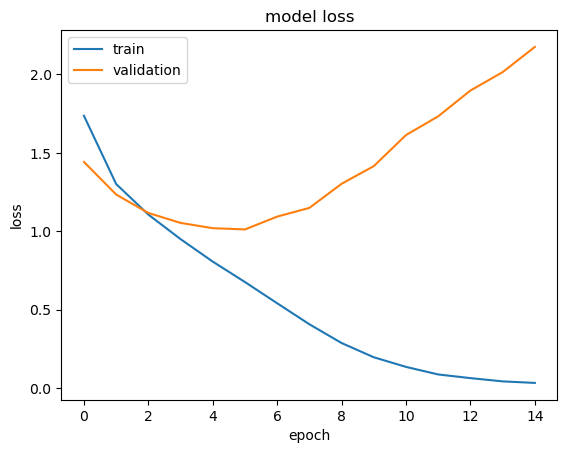

In [69]:
plotLosses(history)

Here we can see while the training score is constantly decreasing, we are overfitting already by around epoch 5, causing the valaidation error to increase.

In [70]:
score = model.evaluate(X_test, y_test, batch_size = 128, verbose = 1)
#2 79/79 [==============================] - 0s 4ms/step - loss: 2.0951 - accuracy: 0.6431

79/79 [==============================] - 0s 5ms/step - loss: 2.1838 - accuracy: 0.6487


Despite the overfitting, we see an accuracy of .65, the highest of the models we have tried. This goes to show the efficacy of CNNs in image recognition. Additional techniques such as adding dropout layers, more effective optimizers like Adam optimization, and many more could prove effective in increasing this accuracy much further. With only a few layers we seem to already significantly improve over other models. These additional layers do come at the cost of some time efficiency however, taking about 7 1/2 seconds per layer, for around two minutes of total runtime. As we add complexity and increase the number of epochs, this could significantly increase. We may then want to take advantage of GPU processing to further speed things up.

# Conclusion

In the end, the Convolutional Neural Network seems to be the most effective of the models we tried, coming in around 10% higher accuracy than the runner up, the kernel Support Vector Classifier. As mentioned, the CNN may also have room for improvement with the addition of other advanced techniques, kSVC may have room for improvement with higher order polynomials or alternate kernels, the MLP may benefit from additional layers or similar techniques to the CNN, but it has been shown many times that CNNs are a highly effective method for image classification by machine learning experts. 

With the added complexity, CNNs begin to slow down, and may take significant time to train, but this may be a necessary trade off of increased accuracy. Some methods like GPU processing may decrease the time taken, however. 